 # hackathon 3:  Clustering
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Clustering \\
  Termina      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4: (%)


 ----


**Note: You may use previous codes from other exercises to read images from the database or to display images.**

#1. DataSet

The database consists of genomic information from 7 types of human body cells: cerebellum, colon, endometrium, hippocampus, kidney, liver, and placenta. There are 189 samples, and each sample has a dimension of 22,215 values. All the information is stored in a matrix, where the columns represent the samples, and the rows contain the genomic information for each sample.

Below, you are provided with the code to load both the data and the labels. Since you will be practicing with unsupervised models, the labels are only for verifying the quality of each cluster.


Link dataset: [Clik Here](https://drive.google.com/file/d/1XE7D2dc2hD7EF0qUuoEmKRL0lmvJw_5C/view?usp=sharing)



In [ ]:
# This code is only for loading the file from drive
# from google.colab import drive
# drive.mount('/content/drive')

# Change the path if your file is in another location
# file_path = '/content/drive/MyDrive/UTEC/CURSOS/2024.1/MACHINE LEARNING/PRACTICA/DataSet/genoma_ML_UTEC.rda'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# !pip install pyreadr
file_path = 'genoma_ML_UTEC.rda'

import pyreadr
import numpy as np
result = pyreadr.read_r(file_path)
print(result.keys())
data = result["e"]
tejidos = result["tissue"]
data = data.T
print(np.unique(tejidos))
print(data.shape)
print(tejidos.shape)


odict_keys(['e', 'tissue', 'tab'])
['cerebellum' 'colon' 'endometrium' 'hippocampus' 'kidney' 'liver'
 'placenta']
(189, 22215)
(189, 1)


#2. Dimensionality Reduction



As you may have noticed, the dimension of each sample is enormous (22,215 values). You will need to reduce the dimensionality to speed up the training of your clustering models.

For this stage, you should compare PCA and Random Projection.

Remember that PCA aims to maximize the variance of the projections with respect to the projected mean of the data. On the other hand, Random Projection uses a matrix of numbers generated by independent Gaussian distributions 𝑁(0,1) to reduce the dimensionality.

Recalling the Johnson-Lindenstrauss theorem:

Sure, here is the translation to English:

---

- Let $X \in \{x_1, x_2, ..., x_n \}$ where $x_i \in \mathbb{R}^{22215} $ and $n=189$

- $\boxed{\forall x,y \in X \,\,\, d(f(x),f(y)) \in [(1-\epsilon)d(x,y),(1+\epsilon)d(x,y)] }$

- $f(x) = A \cdot x_i$ where $A \in \mathbb{R}^{nk}$ is the random matrix and $x_i \in \mathbb{R}^n$ is an element of $X$

The theorem demonstrates that the above is true for $\bbox[orange, 8px]{k \geq \frac{20 \log_2{n}}{\epsilon^2}}$; in our example \(n = 189\).



---

## Task:

Experiment with Random Projection and **find a value $K$** such that the average distance matrix **is smaller in Random Projection** than the average distance matrix in **PCA**.

For PCA, determine the smallest value that retains the most information $\gg90\%$.

Tips:
- To find the distance matrix use: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html)



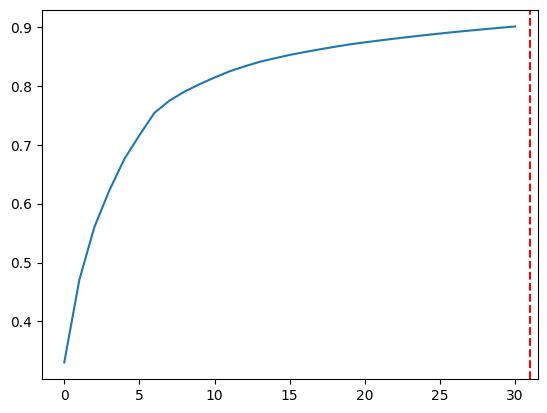

Average distance PCA: 133.0817796911764


In [76]:
# use pca and determine the number of components that explain 90% of the variance. Draw a line to indicate the number of components that explain 90% of the variance and save the value in a variable called n_components
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt

pca = PCA(n_components=0.90)
pca.fit(data)
n_components = pca.n_components_
data_pca = pca.transform(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=n_components, color='r', linestyle='--')
plt.show()

# Paso 3: Calcular la matriz de distancias promedio usando PCA
distance_matrix_pca = pairwise_distances(data_pca)
average_distance_pca = np.mean(distance_matrix_pca)

print(f"Average distance PCA: {average_distance_pca}")


epsilon = 0.1
n = data.shape[0]
# print(np.log2(189)*20/epsilon**2)
optimal_k = int(np.ceil(20*np.log2(n) / (epsilon**2)))

# Clustering


With the reduced data, both with PCA and RP, apply the following clustering algorithms:

* Agglomerative Clustering ([Link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html))
* KMeans ([Link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))
* For the agglomerative algorithm, plot the resulting dendrogram. [Link](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

----
### Report the graph of your dendrogram in Discord, don't forget to include your group number.








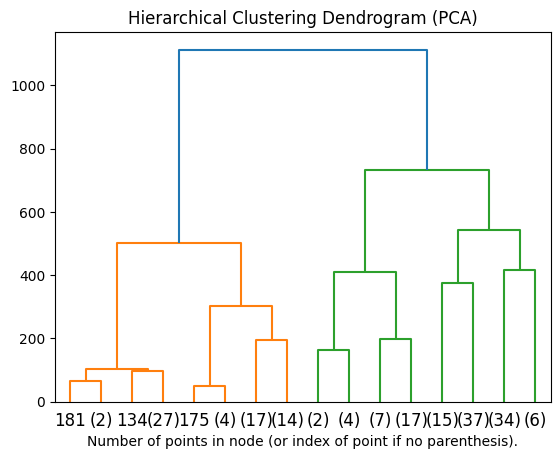

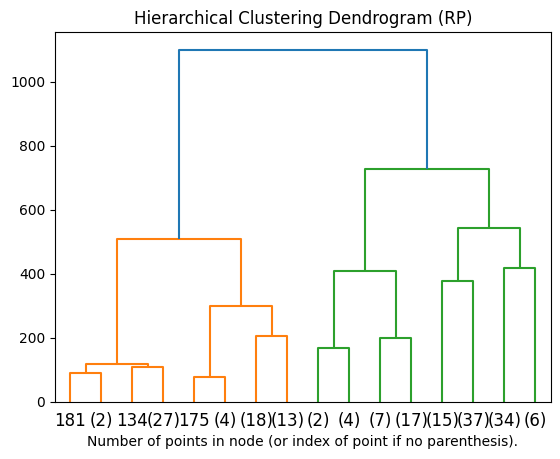

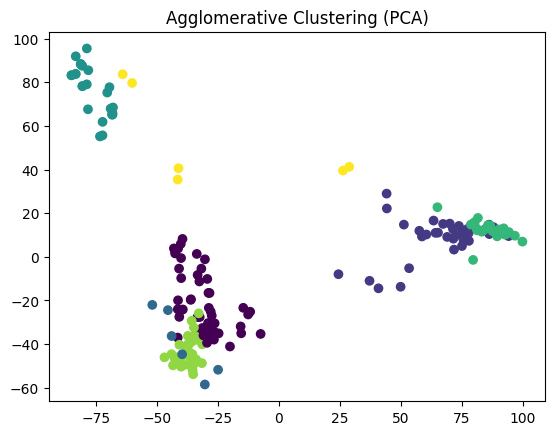

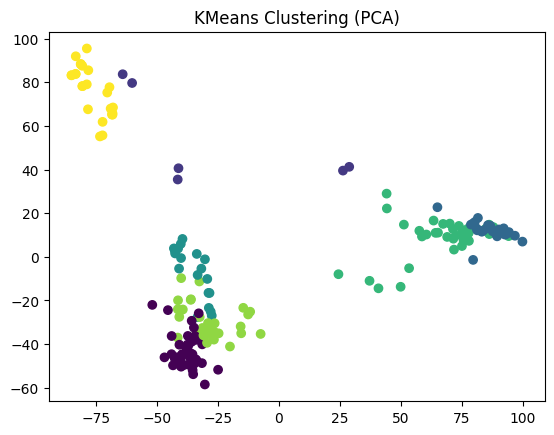

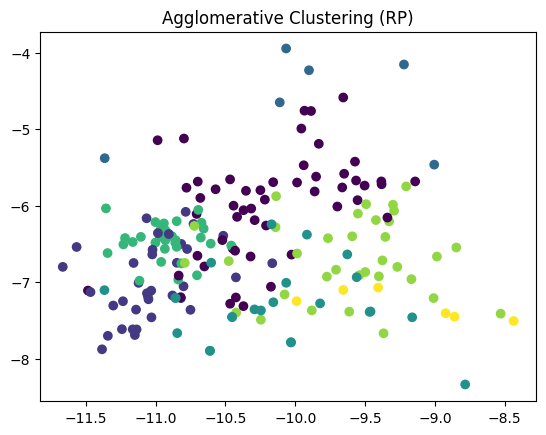

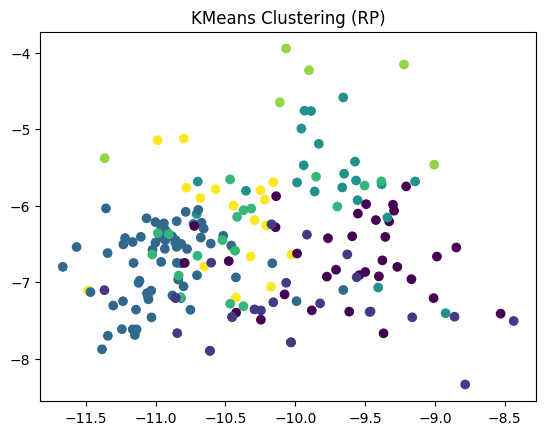

In [77]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

def plot_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()

n_components_pca = n_components 
n_components_rp = optimal_k

pca = PCA(n_components=n_components_pca)
data_pca = pca.fit_transform(data)

rp = GaussianRandomProjection(n_components=n_components_rp)
data_rp = rp.fit_transform(data)

agg_pca = AgglomerativeClustering(n_clusters=7, compute_distances=True)
labels_agg_pca = agg_pca.fit_predict(data_pca)

agg_rp = AgglomerativeClustering(n_clusters=7, compute_distances=True)
labels_agg_rp = agg_rp.fit_predict(data_rp)

kmeans_pca = KMeans(n_clusters=7, random_state=0)
labels_kmeans_pca = kmeans_pca.fit_predict(data_pca)

kmeans_rp = KMeans(n_clusters=7, random_state=0)
labels_kmeans_rp = kmeans_rp.fit_predict(data_rp)

plt.title("Hierarchical Clustering Dendrogram (PCA)")
plot_dendrogram(agg_pca, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

plt.title("Hierarchical Clustering Dendrogram (RP)")
plot_dendrogram(agg_rp, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Visualización para PCA
plot_clusters(data_pca, labels_agg_pca, 'Agglomerative Clustering (PCA)')
plot_clusters(data_pca, labels_kmeans_pca, 'KMeans Clustering (PCA)')

# Visualización para RP
plot_clusters(data_rp, labels_agg_rp, 'Agglomerative Clustering (RP)')
plot_clusters(data_rp, labels_kmeans_rp, 'KMeans Clustering (RP)')

# Analyzing clustering quality

Verify the quality of each cluster using the Rand Index Score (explicit metric) and Silhouette Coefficient (implicit metric). This function takes the labels generated by the model and the true labels and verifies the quality of the clustering. The closer the result is to 1, the better the clustering.

- ARI >= 0.90: Excellent recovery.
- 0.80 <= ARI < 0.90: Good recovery.
- 0.65 <= ARI < 0.80: Moderate recovery.
- ARI < 0.65: Poor recovery.


### Report the results of your Rand Index Score and Silhouette Coefficient with KMeans and Agglomerative, with PCA reduction and with RP reduction, on Discord. Don't forget to include your group number.

In [78]:
# write all your code here
from sklearn.metrics import adjusted_rand_score, silhouette_score

true_labels = tejidos.to_numpy().flatten()

def evaluate_clustering(labels, data, true_labels):
    ari = adjusted_rand_score(true_labels, labels)
    silhouette = silhouette_score(data, labels)
    return ari, silhouette

# Evaluación de KMeans y Agglomerative Clustering con PCA
ari_kmeans_pca, silhouette_kmeans_pca = evaluate_clustering(labels_kmeans_pca, data_pca, true_labels)
ari_agg_pca, silhouette_agg_pca = evaluate_clustering(labels_agg_pca, data_pca, true_labels)

# Evaluación de KMeans y Agglomerative Clustering con Random Projection
ari_kmeans_rp, silhouette_kmeans_rp = evaluate_clustering(labels_kmeans_rp, data_rp, true_labels)
ari_agg_rp, silhouette_agg_rp = evaluate_clustering(labels_agg_rp, data_rp, true_labels)

# Reporte de resultados
print("PCA Reduction:")
print(f"KMeans - ARI: {ari_kmeans_pca:.2f}, Silhouette: {silhouette_kmeans_pca:.2f}")
print(f"Agglomerative - ARI: {ari_agg_pca:.2f}, Silhouette: {silhouette_agg_pca:.2f}")

print("\nRandom Projection Reduction:")
print(f"KMeans - ARI: {ari_kmeans_rp:.2f}, Silhouette: {silhouette_kmeans_rp:.2f}")
print(f"Agglomerative - ARI: {ari_agg_rp:.2f}, Silhouette: {silhouette_agg_rp:.2f}")


PCA Reduction:
KMeans - ARI: 0.72, Silhouette: 0.39
Agglomerative - ARI: 0.79, Silhouette: 0.42

Random Projection Reduction:
KMeans - ARI: 0.70, Silhouette: 0.33
Agglomerative - ARI: 0.79, Silhouette: 0.33


# Conclusion

- It is advisable to use Random Projection ?
- If your answer is no, why do you think it is not advisable to use RP?
- Between which classes are more errors made?  
